In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
##import geopandas as gpd

In [2]:
SpaceM = pd.read_csv('space_missions.csv', encoding = 'latin-1')
SpaceM.head()

,Company,Location,Date,Year_session,Time,Rocket,Mission,Rocket Status,Price,Mission Status
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",10/4/1957,1957-1958,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",11/3/1957,1957-1958,2:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",12/6/1957,1957-1958,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",2/1/1958,1957-1958,3:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",2/5/1958,1957-1958,7:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [3]:
SpaceM.dtypes

Company           object
Location          object
Date              object
Year_session      object
Time              object
Rocket            object
Mission           object
Rocket Status     object
Price             object
Mission Status    object
dtype: object

In [4]:
SpaceM.info

<bound method DataFrame.info of         Company                                         Location       Date  \
0     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan  10/4/1957   
1     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan  11/3/1957   
2       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA  12/6/1957   
3          AMBA         LC-26A, Cape Canaveral AFS, Florida, USA   2/1/1958   
4       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA   2/5/1958   
...         ...                                              ...        ...   
4625     SpaceX          SLC-4E, Vandenberg SFB, California, USA  7/22/2022   
4626       CASC  LC-101, Wenchang Satellite Launch Center, China  7/24/2022   
4627     SpaceX       LC-39A, Kennedy Space Center, Florida, USA  7/24/2022   
4628  CAS Space           Jiuquan Satellite Launch Center, China  7/27/2022   
4629       CASC     LC-3, Xichang Satellite Launch Center, China  7/29/2022   

     Year_session  

In [5]:
SpaceM.shape

(4630, 10)

In [6]:
SpaceM.describe()

,Company,Location,Date,Year_session,Time,Rocket,Mission,Rocket Status,Price,Mission Status
count,4630,4630,4630,4630,4503,4630,4630,4630,1265,4630
unique,62,158,4180,66,1300,370,4556,2,65,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",4/26/1962,2021-2022,12:00:00,Cosmos-3M (11K65M),DSP,Retired,450,Success
freq,1777,251,4,159,52,446,8,3620,136,4162


In [7]:
SpaceM.columns
print(SpaceM['Rocket Status'].value_counts())

Retired    3620
Active     1010
Name: Rocket Status, dtype: int64


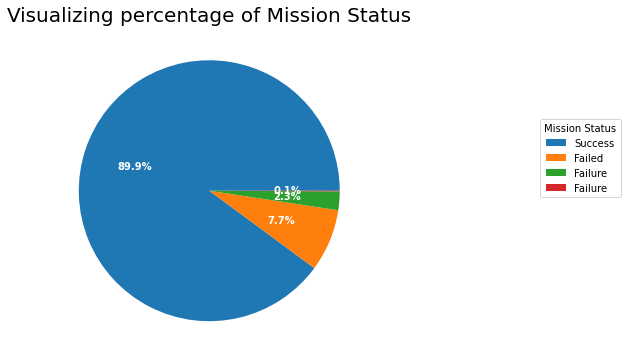

In [8]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

dataset = ["4162 Success",
          "357 Failed",
          "107 Partial Failure",
          "4 Prelaunch Failure"]
data = [float(x.split()[0]) for x in dataset]
sms = [x.split()[-1] for x in dataset]

wedges, texts, autotexts ,  = ax.pie(data, autopct = '%2.1f%%',
                                  textprops=dict(color="w"))

ax.legend(wedges, sms,
          title="Mission Status",
          loc="center left",
          bbox_to_anchor=(1.5, 0,0,1.2))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Visualizing percentage of Mission Status", size=20)

#plt.rcParams["figure.figsize"] = [6.00,6.50]
plt.show()

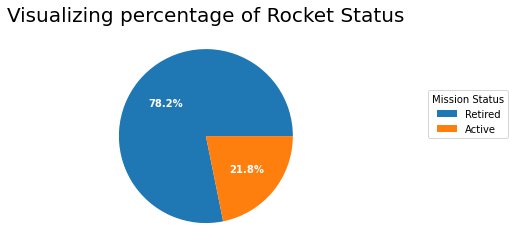

In [9]:
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))

dataset = ["3620 Retired",
          "1010 Active",]
data = [float(x.split()[0]) for x in dataset]
sms = [x.split()[-1] for x in dataset]

wedges, texts, autotexts ,  = ax.pie(data, autopct = '%2.1f%%',
                                  textprops=dict(color="w"))

ax.legend(wedges, sms,
          title="Mission Status",
          loc="center left",
          bbox_to_anchor=(1.5, 0,0,1.2))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Visualizing percentage of Rocket Status", size=20)

#plt.rcParams["figure.figsize"] = [6.00,6.50]
plt.show()

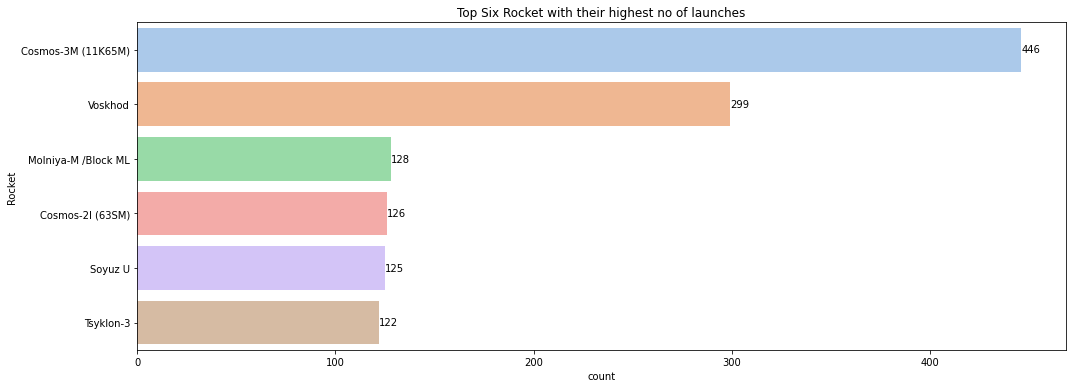

In [10]:
plt.rcParams ["figure.figsize"]=[15.00, 5.50]
plt.rcParams ["figure.autolayout"] = True

x= sns.countplot(y = "Rocket", data = SpaceM, palette = "pastel", 
                 order = SpaceM.Rocket.value_counts().iloc[:6].index)
x.set_title("Top Six Rocket with their highest no of launches")
x.bar_label(x.containers[0])
plt.show()

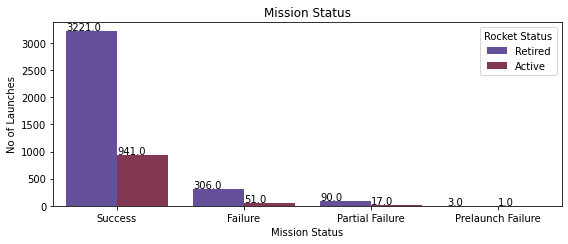

In [11]:
plt.rcParams ["figure.figsize"]=[8.00, 3.50]
plt.rcParams ["figure.autolayout"] = True

new = sns.countplot(x = 'Mission Status', data = SpaceM, hue = 'Rocket Status', palette = "twilight")

new.set(xlabel = "Mission Status", ylabel ="No of Launches", title = "Mission Status")
for p in new.patches:
    new.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+15))
plt.show()

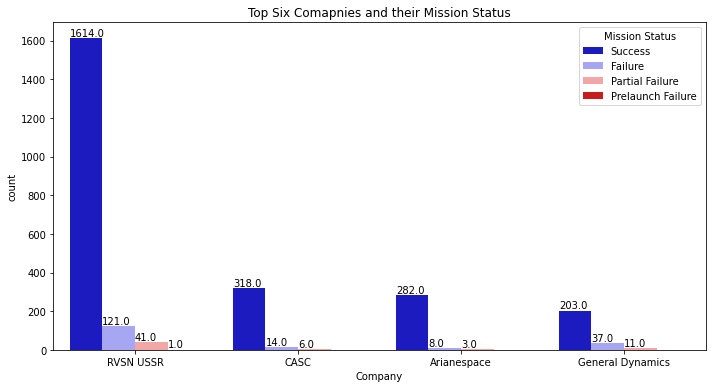

In [12]:
plt.rcParams ["figure.figsize"]=[10.00, 5.50]
plt.rcParams ["figure.autolayout"] = True

ms = sns.countplot(x = "Company", hue = "Mission Status", data = SpaceM, palette="seismic",
                  hue_order = ["Success", "Failure", "Partial Failure",  "Prelaunch Failure"],
                  order = SpaceM.Company.value_counts().iloc[:4].index)
ms.set_title("Top Six Comapnies and their Mission Status")
for p in ms.patches:
     ms.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+10))
plt.show()

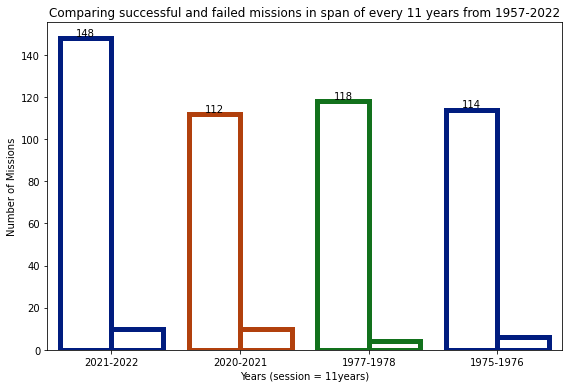

In [13]:
plt.rcParams ["figure.figsize"]=[8.00, 5.50]
plt.rcParams ["figure.autolayout"] = True

X = sns.countplot(x = "Year_session", data = SpaceM, facecolor = (0, 0, 0, 0), linewidth = 5,
                 edgecolor = sns.color_palette("dark", 3), hue = 'Mission Status',hue_order = ["Success", "Failure"],
                  order = SpaceM.Year_session.value_counts().iloc[:4].index)
X.get_legend().remove()
X.bar_label(X.containers[0])
X.set(xlabel = "Years (session = 11years)", ylabel = "Number of Missions",
    title = 'Comparing successful and failed missions in span of every 11 years from 1957-2022')
plt.show()